In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy



In [7]:
print(os.listdir("C:/Users/DCL/Desktop/segmentation/ECG/"))

['Test', 'Train']


In [8]:
train_images = []
train_labels = [] 
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("C:/Users/DCL/Desktop/segmentation/ECG/Train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob("C:/Users/DCL/Desktop/segmentation/ECG/Test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
#x_train, x_test = x_train / 255.0, x_test / 255.0

###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset
####################################################################
#Extract features from training images
image_features = feature_extractor(x_train)
X_for_ML =image_features

Abnormal Heartbeats
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (1).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (10).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (100).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (101).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (102).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (103).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (104).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (105).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (106).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (107).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (108).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (109).png
C:/Users/DCL/Desktop/segmentation/E

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (2).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (20).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (200).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (201).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (202).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (203).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (204).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (205).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (206).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (207).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (208).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (209).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal He

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (312).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (313).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (314).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (315).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (316).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (317).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (318).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (319).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (320).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (321).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (322).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (446).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (447).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (448).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (449).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (45).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (450).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (451).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (452).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (453).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (454).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (455).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (456).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (85).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (86).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (87).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (88).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (89).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (9).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (90).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (91).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (92).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (93).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (94).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVF  (95).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\a

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (242).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (243).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (244).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (248).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (249).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (25).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (250).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (251).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (252).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (4).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (40).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (400).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (401).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (402).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (403).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (404).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (405).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (406).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (407).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (408).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (409).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal He

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (526).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (527).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (528).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (529).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (53).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (530).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (531).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (532).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (533).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (534).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (535).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVL  (536).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (201).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (202).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (203).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (204).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (205).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (206).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (207).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (208).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (209).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (21).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (210).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (211).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (35).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (350).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (351).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (352).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (353).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (354).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (355).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (356).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (357).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (358).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (359).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (36).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal H

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (493).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (494).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (495).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (496).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (497).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (498).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (499).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (5).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (50).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (500).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (501).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\aVR  (502).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal He

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (162).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (163).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (164).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (165).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (166).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (167).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (168).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (169).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (17).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (170).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (171).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (172).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (173).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (33).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (330).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (331).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (332).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (333).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (334).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (335).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (336).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (337).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (338).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (339).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (34).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (340).png
C

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (48).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (480).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (481).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (482).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (483).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (484).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (485).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (486).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (487).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (488).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (489).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (49).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I  (490).png
C

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (134).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (135).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (136).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (137).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (138).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (139).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (14).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (140).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (141).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (142).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (143).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (144).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (306).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (307).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (308).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (309).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (31).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (310).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (311).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (312).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (313).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (314).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (315).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (316).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (455).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (456).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (457).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (458).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (459).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (46).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (460).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (461).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (462).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (463).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (464).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (465).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\I

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (79).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (8).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (80).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (81).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (82).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (83).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (84).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (85).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (86).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (87).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (88).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (89).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\II  (9).png
C

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (224).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (225).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (226).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (227).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (228).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (229).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (23).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (230).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (231).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (232).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (233).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (234).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (387).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (388).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (389).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (39).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (390).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (391).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (392).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (393).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (394).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (395).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (396).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (397).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (504).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (505).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (506).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (507).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (508).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (509).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (51).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (510).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (511).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (512).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (513).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\III  (514).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal 

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (128).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (129).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (130).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (131).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (132).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (133).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (134).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (135).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (136).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (137).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (138).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (139).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (294).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (295).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (296).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (297).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (298).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (299).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (3).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (30).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (300).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (301).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (302).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (303).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (304).png
C:

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (448).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (449).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (45).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (450).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (451).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (452).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (453).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (454).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (455).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (456).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (457).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (458).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (459).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (87).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (88).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (89).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (9).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (90).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (91).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (92).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (93).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (94).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (95).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (96).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (97).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V1 (98).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (24).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (240).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (241).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (242).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (243).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (244).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (248).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (249).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (25).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (40).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (400).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (401).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (402).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (403).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (404).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (405).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (406).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (407).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (408).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (409).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (41).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (529).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (53).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (530).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (531).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (532).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (533).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (534).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (535).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (536).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (537).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (538).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V2  (539).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (190).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (191).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (192).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (193).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (194).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (195).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (196).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (197).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (198).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (199).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (2).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (20).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (200).png
C:

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (335).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (336).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (337).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (338).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (339).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (34).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (340).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (341).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (342).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (343).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (344).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (345).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (346).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (476).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (477).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (478).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (479).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (48).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (480).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (481).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (482).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (483).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (484).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (485).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (486).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V3 (487).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (125).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (126).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (127).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (128).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (129).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (130).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (131).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (132).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (133).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (134).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (135).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (136).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (248).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (249).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (25).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (250).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (251).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (252).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (253).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (254).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (255).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (256).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (359).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (36).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (360).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (361).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (362).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (363).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (364).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (365).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (366).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (367).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (368).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (369).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (37).png
C

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (486).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (487).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (488).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (489).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (49).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (490).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (491).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (492).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (493).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (494).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (495).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (496).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V4 (497).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (135).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (136).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (137).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (138).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (139).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (14).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (140).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (141).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (142).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (143).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (144).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (145).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (274).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (275).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (276).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (277).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (278).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (279).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (28).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (280).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (281).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (282).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (283).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (284).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (416).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (417).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (418).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (419).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (42).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (420).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (421).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (422).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (423).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (424).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (425).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (426).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (534).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (535).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (536).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (537).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (538).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (539).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (54).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (540).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (541).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (542).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (543).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V5  (544).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (196).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (197).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (198).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (199).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (2).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (20).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (200).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (201).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (202).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (203).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (204).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (205).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (206).png
C:

C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (342).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (343).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (344).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (345).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (346).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (347).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (348).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (349).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (35).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (350).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (351).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (352).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (353).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (48).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (480).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (481).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (482).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (483).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (484).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (485).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (486).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (487).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (488).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (489).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (49).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Abnormal Heartbeats\V6 (490).png
C

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (105).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (106).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (107).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (108).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (109).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (11).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (110).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (111).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (112).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (113).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (114).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (115).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (116).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (117).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (118).

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (28).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (29).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (3).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (30).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (31).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (33).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (34).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (35).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (36).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (37).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (38).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (39).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (4).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVF (40).png
C:/Users/DCL

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (213).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (214).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (215).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (216).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (217).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (218).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (219).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (22).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (220).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (221).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (222).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (223).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (224).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVL  (225).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (173).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (174).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (175).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (176).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (177).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (178).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (179).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (18).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (180).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (181).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (182).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (183).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (184).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\aVR  (185).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (128).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (129).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (130).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (131).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (132).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (133).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (134).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (135).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (136).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (137).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (138).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (139).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (14).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (140).png
C:/Users/DCL

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (60).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (61).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (62).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (63).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (64).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (65).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (66).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (67).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (68).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (69).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (7).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (70).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (72).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\I  (73).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (240).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (241).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (242).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (243).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (244).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (248).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (249).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (25).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (250).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (26).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (27).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\II  (28).png

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (183).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (184).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (185).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (186).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (187).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (188).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (189).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (19).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (190).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (191).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (192).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (193).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (194).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\III  (195).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (14).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (140).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (141).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (142).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (143).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (144).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (145).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (146).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (147).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (148).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (149).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (15).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (150).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (151).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (152).p

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (62).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (63).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (64).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (65).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (66).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (67).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (68).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (69).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (7).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (70).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (72).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (73).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (74).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V1  (75).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (235).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (236).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (237).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (238).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (239).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (24).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (240).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (241).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (242).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (243).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (244).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V2  (248).

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (172).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (173).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (174).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (175).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (176).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (177).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (178).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (179).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (18).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (180).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (181).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (182).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (183).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (184).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V3  (185).

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (105).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (106).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (107).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (108).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (109).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (11).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (110).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (111).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (112).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (113).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (114).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (115).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (116).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (117).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (118).

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (242).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (243).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (244).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (248).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (249).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (25).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (250).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (26).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (27).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (28).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (29).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V4  (3).png
C:

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (168).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (169).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (17).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (170).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (171).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (172).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (173).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (174).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (175).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (176).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (177).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (178).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (179).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (18).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (180).p

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (98).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V5  (99).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (1).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (10).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (100).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (101).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (102).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (103).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (104).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (105).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (106).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (107).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (108).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (109).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (11).png
C

C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (243).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (244).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (248).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (249).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (25).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (250).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (26).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (27).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (28).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (29).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (3).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Covid-19\V6  (30).png
C:/

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (121).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (122).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (123).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (124).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (125).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (126).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (127).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (128).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (129).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVF (130).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (108).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (109).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (11).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (110).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (111).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (112).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (113).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (114).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (115).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (116).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (117).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (66).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (67).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (68).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (69).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (7).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (70).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (72).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (73).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (74).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVL (75).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (33).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (34).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (35).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (36).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (37).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (38).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (39).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (4).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (40).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\aVR (41).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (184).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (185).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (186).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (187).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (188).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (189).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (19).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (190).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (191).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (192).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\I  (193).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (166).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (167).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (168).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (169).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (17).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (170).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (171).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (172).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (173).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (174).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\II  (175).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (151).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (152).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (153).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (154).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (155).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (156).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (157).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (158).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (159).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III  (16).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\III 

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (122).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (123).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (124).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (125).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (126).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (127).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (128).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (129).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (130).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (131).png


C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (72).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (73).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (74).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (75).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (76).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (77).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (78).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (79).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (8).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V1  (80).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (26).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (27).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (28).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (29).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (3).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (30).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (31).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (33).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (34).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V2 (35).png
C:/Users/DCL/Desktop/s

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (166).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (167).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (168).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (169).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (17).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (170).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (171).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (172).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (173).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (174).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V3 (175).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (123).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (124).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (125).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (126).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (127).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (128).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (129).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (130).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (131).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (132).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (64).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (65).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (66).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (67).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (68).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (69).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (7).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (70).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (72).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V4 (73).png
C:/Users/DCL/Desktop/s

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (190).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (191).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (192).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (193).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (194).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (195).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (196).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (197).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (198).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (199).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V5 (2).png
C:/Users/DCL

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (135).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (136).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (137).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (138).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (139).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (14).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (140).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (141).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (142).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (143).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (144).png
C:/Users/DC

C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (86).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (87).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (88).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (89).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (9).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (90).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (91).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (92).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (93).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (94).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\History of Myocardial Infarction\V6 (95).png
C:/Users/DCL/Desktop/s

C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (44).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (45).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (46).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (47).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (48).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (49).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (5).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (50).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (51).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (52).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (53).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\aVR (54).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardia

C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\II (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\II (72).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\II (73).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\II (74).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\II (8).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\II (9).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\III (1).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\III (10).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\III (11).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\III (12).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\III (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\III (14).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarc

C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (23).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (24).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (25).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (26).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (27).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (28).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (29).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (3).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (30).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (31).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V2 (33).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction

C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (53).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (54).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (55).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (56).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (57).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (58).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (59).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (6).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (60).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (61).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (62).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V4 (63).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction

C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (69).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (7).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (70).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (72).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (73).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (74).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (8).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Myocardial Infarction\V6 (9).png
Normal Heartbeats
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (1).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (10).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (100).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbe

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (354).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (355).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (356).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (357).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (358).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (359).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (36).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (360).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (361).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (362).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (363).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (364).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (365).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (515).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (516).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (517).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (518).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (519).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (52).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (520).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (521).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (522).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (523).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (524).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (525).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (526).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (669).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (67).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (670).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (671).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (672).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (673).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (674).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (675).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (676).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (677).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (678).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (679).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (68).png
C:/Users/DCL/D

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (815).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (816).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (817).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (818).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (819).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (82).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (820).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (821).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (822).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (823).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (824).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (825).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVF (826).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (196).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (197).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (198).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (199).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (2).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (20).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (200).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (201).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (202).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (203).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (204).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (205).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (206).png
C:/Users/DCL/De

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (336).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (337).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (338).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (339).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (34).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (340).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (341).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (342).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (343).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (344).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (345).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (346).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (347).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (479).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (48).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (480).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (481).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (482).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (483).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (484).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (485).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (486).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (487).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (488).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (489).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (49).png
C:/Users/DCL/D

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (618).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (619).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (62).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (620).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (621).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (622).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (623).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (624).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (625).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (626).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (627).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (628).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (629).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (757).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (758).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (759).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (76).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (760).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (761).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (762).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (763).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (764).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (765).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (766).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (767).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVL (768).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (138).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (139).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (14).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (140).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (141).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (142).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (143).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (144).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (145).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (146).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (147).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (148).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (149).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (317).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (318).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (319).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (320).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (321).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (322).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (323).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (324).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (325).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (326).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (327).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (328).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (496).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (497).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (498).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (499).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (5).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (50).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (500).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (501).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (502).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (503).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (504).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (505).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (506).png
C:/Users/DCL/De

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (692).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (693).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (694).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (695).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (696).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (697).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (698).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (699).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (7).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (70).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (700).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (701).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (702).png
C:/Users/DCL/De

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (89).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (9).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (90).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (91).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (92).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (93).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (94).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (95).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (96).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (97).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (98).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\aVR (99).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (1).png
C:/Users/DCL/Desktop/segmenta

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (238).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (239).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (24).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (240).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (241).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (242).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (243).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (244).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (245).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (246).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (247).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (248).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (249).png
C:/Users/DCL/Desktop/segmentation/ECG/T

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (406).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (407).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (408).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (409).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (41).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (410).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (411).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (412).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (413).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (414).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (415).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (416).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (417).png
C:/Users/DCL/Desktop/segmentation/ECG/T

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (579).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (58).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (580).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (581).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (582).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (583).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (584).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (585).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (586).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (587).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (588).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (589).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (59).png
C:/Users/DCL/Desktop/segmentation/ECG/Tr

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (754).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (755).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (756).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (757).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (758).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (759).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (76).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (760).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (761).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (762).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (763).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (764).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\I (765).png
C:/Users/DCL/Desktop/segmentation/ECG/T

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (162).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (163).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (164).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (165).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (166).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (167).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (168).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (169).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (17).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (170).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (171).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (172).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (173).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (327).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (328).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (329).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (33).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (330).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (331).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (332).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (333).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (334).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (335).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (336).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (337).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (338).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (47).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (470).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (471).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (472).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (473).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (474).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (475).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (476).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (477).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (478).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (479).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (48).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (480).png
C:/Users/DCL/Desktop/segmen

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (599).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (6).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (60).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (600).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (601).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (602).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (603).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (604).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (605).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (606).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (607).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (608).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (609).png
C:/Users/DCL/Desktop/segment

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (753).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (754).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (755).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (756).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (757).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (758).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (759).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (76).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (760).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (761).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (762).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (763).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\II (764).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (125).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (126).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (127).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (128).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (129).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (13).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (130).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (131).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (132).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (133).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (134).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (135).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (136).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (256).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (257).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (258).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (259).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (26).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (260).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (261).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (262).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (263).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (264).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (265).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (266).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (267).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (414).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (415).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (416).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (417).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (418).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (419).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (42).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (420).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (421).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (422).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (423).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (424).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (425).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (577).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (578).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (579).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (58).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (580).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (581).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (582).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (583).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (584).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (585).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (586).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (587).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (588).png
C:/Users/DCL/

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (75).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (750).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (751).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (752).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (753).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (754).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (755).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (756).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (757).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (758).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (759).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (76).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\III (760).png
C:/Users/DCL/D

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (144).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (145).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (146).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (147).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (148).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (149).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (15).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (150).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (151).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (152).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (153).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (154).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (155).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (351).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (352).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (353).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (354).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (355).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (356).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (357).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (358).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (359).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (36).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (360).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (361).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (362).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (555).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (556).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (557).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (558).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (559).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (56).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (560).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (561).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (562).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (563).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (564).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (565).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (566).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (763).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (764).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (765).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (766).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (767).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (768).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (769).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (77).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (770).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (771).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (772).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (773).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V1 (774).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (165).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (166).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (167).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (168).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (169).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (17).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (170).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (171).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (172).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (173).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (174).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (175).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (176).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (293).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (294).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (295).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (296).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (297).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (298).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (299).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (3).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (30).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (300).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (301).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (302).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (303).png
C:/Users/DCL/Desktop/segment

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (434).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (435).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (436).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (437).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (438).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (439).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (44).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (440).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (441).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (442).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (443).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (444).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (445).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (572).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (573).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (574).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (575).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (576).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (577).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (578).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (579).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (58).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (580).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (581).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (582).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (583).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (730).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (731).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (732).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (733).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (734).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (735).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (736).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (737).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (738).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (739).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (74).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (740).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V2 (741).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (11).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (110).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (111).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (112).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (113).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (114).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (115).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (116).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (117).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (118).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (119).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (12).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (120).png
C:/Users/DCL/Desktop/segmen

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (31).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (310).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (311).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (312).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (313).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (314).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (315).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (316).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (317).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (318).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (319).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (320).png
C:/Users/DCL/Desktop/segmen

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (442).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (443).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (444).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (445).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (446).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (447).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (448).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (449).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (45).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (450).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (451).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (452).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (453).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (58).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (580).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (581).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (582).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (583).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (584).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (585).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (586).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (587).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (588).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (589).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (59).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (590).png
C:/Users/DCL/Desktop/segmen

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (706).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (707).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (708).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (709).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (71).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (710).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (711).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (712).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (713).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (714).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (715).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (716).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (717).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (806).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (807).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (808).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (809).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (81).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (810).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (811).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (812).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (813).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (814).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (815).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (816).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V3 (817).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (211).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (212).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (213).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (214).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (215).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (216).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (217).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (218).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (219).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (22).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (220).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (221).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (222).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (317).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (318).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (319).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (32).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (320).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (321).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (322).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (323).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (324).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (325).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (326).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (327).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (328).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (504).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (505).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (506).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (507).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (508).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (509).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (51).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (510).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (511).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (512).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (513).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (514).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (515).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (625).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (626).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (627).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (628).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (629).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (63).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (630).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (631).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (632).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (633).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (634).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (635).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (636).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (813).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (814).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (815).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (816).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (817).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (818).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (819).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (82).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (820).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (821).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (822).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (823).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V4 (824).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (202).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (203).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (204).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (205).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (206).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (207).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (208).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (209).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (21).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (210).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (211).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (212).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (213).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (378).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (379).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (38).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (380).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (381).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (382).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (383).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (384).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (385).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (386).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (387).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (388).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (389).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (514).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (515).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (516).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (517).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (518).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (519).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (52).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (520).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (521).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (522).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (523).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (524).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (525).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (661).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (662).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (663).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (664).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (665).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (666).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (667).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (668).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (669).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (67).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (670).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (671).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (672).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (795).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (796).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (797).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (798).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (799).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (8).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (80).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (800).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (801).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (802).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (803).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (804).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V5 (805).png
C:/Users/DCL/Desktop/segment

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (158).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (159).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (16).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (160).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (161).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (162).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (163).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (164).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (165).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (166).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (167).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (168).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (169).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (293).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (294).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (295).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (296).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (297).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (298).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (299).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (3).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (30).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (300).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (301).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (302).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (303).png
C:/Users/DCL/Desktop/segment

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (443).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (444).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (445).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (446).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (447).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (448).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (449).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (45).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (450).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (451).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (452).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (453).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (454).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (583).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (584).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (585).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (586).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (587).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (588).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (589).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (59).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (590).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (591).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (592).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (593).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (594).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (722).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (723).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (724).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (725).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (726).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (727).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (728).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (729).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (73).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (730).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (731).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (732).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (733).png
C:/Users/DCL/Desktop/segme

C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (851).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (852).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (853).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (854).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (855).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (856).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (857).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (858).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (859).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (86).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (87).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (88).png
C:/Users/DCL/Desktop/segmentation/ECG/Train\Normal Heartbeats\V6 (89).png
C:/Users/DCL/Desktop/segmenta

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 23184, number of used features: 17
[LightGBM] [Info] Start training from score -1.263692
[LightGBM] [Info] Start training from score -2.044850
[LightGBM] [Info] Start training from score -2.253105
[LightGBM] [Info] Start training from score -3.262246
[LightGBM] [Info] Start training from score -0.810542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy =  0.708281315022888
The prediction for this image is:  ['Abnormal Heartbeats']
The actual label for this image is:  Abnormal Heartbeats


c:\users\dcl\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


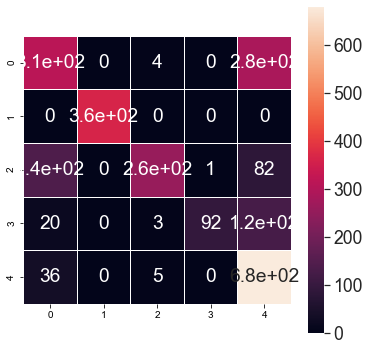

In [9]:
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3
d_train = lgb.Dataset(X_for_ML, label=y_train)

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':100,
              'max_depth':10,
              'num_class':5}  #no.of unique values in the target class not inclusive of the end value


lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates



#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])